# 1. Importando e instalando dependências

In [1]:
!pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Definindo Keypoints com MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw conexões mão esquerda
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw conexões mão direita

In [12]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [99]:
cap = cv2.VideoCapture(0)
# Set modelo mediapipe 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Leitura do feed feed
        ret, frame = cap.read()

        # Detecção
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Exibe na tela
        cv2.imshow('OpenCV Feed', image)

        # Saída
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Flavia Almeida\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [101]:
draw_landmarks(frame, results)

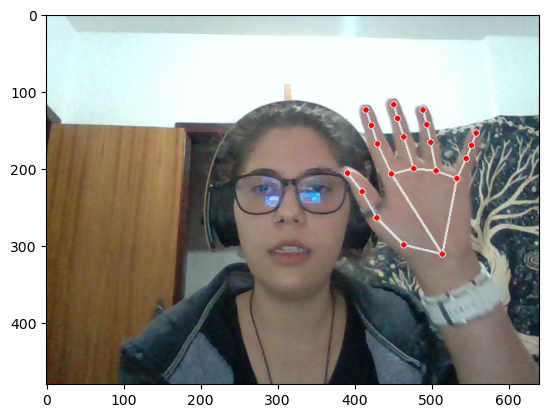

In [103]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extração dos valores de Keypoint

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [27]:
result_test = extract_keypoints(results)

In [29]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 7.39919186e-01,  7.25112975e-01,  3.05695579e-07,  6.80482924e-01,
        6.91335320e-01, -1.62051674e-02,  6.35421455e-01,  6.23717248e-01,
       -2.30358411e-02,  6.10830247e-01,  5.65253258e-01, -2.92919092e-02,
        5.84470630e-01,  5.24655998e-01, -3.55037861e-02,  6.80794418e-01,
        5.19853830e-01, -9.58625041e-03,  6.63707078e-01,  4.41536903e-01,
       -2.16600467e-02,  6.55786753e-01,  3.93339932e-01, -3.29156779e-02,
        6.50870264e-01,  3.53448838e-01, -4.21376973e-02,  7.21753001e-01,
        5.10906935e-01, -1.49080176e-02,  7.15407550e-01,  4.22893643e-01,
       -2.38835774e-02,  7.11238444e-01,  3.68696749e-01, -3.54593433e-02,
        7.07429171e-01,  3.25237095e-01, -4.49087098e-02,  7.60885835e-01,
        5.21435797e-01, -2.32719164e-02,  7.62821913e-01,  4.37829792e-01,
       -3.76159139e-02,  7.62135386e-01,  3.84822130e-01, -5.07215075e-02,
        7.59683728e-01,  3.39382827e-01, -6.07421100e-02,  7.97980666e-01,
        5.49107492e-01, -

# 4. Prepara pastas para a colection

In [34]:
# Local para exportar dados
DATA_PATH = os.path.join('MP_Data') 

# Ações a serem detectadas
actions = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'J', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U','V', 'W', 'X', 'Y', 'Z', 'DOENTE', 'ESTUDAR', 'POR_FAVOR', 'PORQUE', 'TRABALHO'])

# Número de vídeos para cada ação
no_sequences = 30

# Os vídeos teram 30 frames
sequence_length = 30

In [189]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Coleta de valores de Keypoint para treinamento e teste

In [192]:
cap = cv2.VideoCapture(0)
# Set modelo mediapipe  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop para as ações
    for action in actions:
        # Loop para sequencia de vídeos
        for sequence in range(no_sequences):
            # Loop para sequencia de frames por video
            for frame_num in range(sequence_length):

                # Leitura
                ret, frame = cap.read()

                # Detecção
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Lógica de espera entre um vídeo e outro
                if frame_num == 0: 
                    cv2.putText(image, 'Comece', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Coletando frames para {} Video N° {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Exibe em tela o aviso de inicio da captura do vídeo
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Coletando frames para {} Video N° {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Exibe em tela o aviso do número da sequencia e a ação que está sendo captada
                    cv2.imshow('OpenCV Feed', image)
                
                # Exportando keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Saída
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [194]:
cap.release()
cv2.destroyAllWindows()

# 6. Processamento de dados e criação de Labels

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [38]:
label_map = {label:num for num, label in enumerate(actions)}

In [40]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'J': 10,
 'H': 8,
 'I': 9,
 'K': 11,
 'L': 12,
 'M': 13,
 'N': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'T': 20,
 'U': 21,
 'V': 22,
 'W': 23,
 'X': 24,
 'Y': 25,
 'Z': 26,
 'DOENTE': 27,
 'ESTUDAR': 28,
 'POR_FAVOR': 29,
 'PORQUE': 30,
 'TRABALHO': 31}

In [42]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [44]:
np.array(sequences).shape

(960, 30, 126)

In [46]:
X = np.array(sequences)

In [48]:
X.shape

(960, 30, 126)

In [50]:
y = to_categorical(labels).astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [54]:
y_test.shape

(48, 32)

# 7. Construção e treinamento LSTM Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard

In [59]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [61]:
model = Sequential()

# Primeira camada LSTM com Dropout e Batch Normalization
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30, 126)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Segunda camada LSTM com Dropout e Batch Normalization
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Terceira camada LSTM com Dropout e Batch Normalization
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Primeira camada densa
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Segunda camada densa
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Camada de saída
model.add(Dense(actions.shape[0], activation='softmax'))

In [63]:
res = [.7, 0.2, 0.1]

In [65]:
actions[np.argmax(res)]

'A'

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
29/29 [==============================] - 8s 45ms/step - loss: 3.5061 - accuracy: 0.0493
Epoch 2/200
29/29 [==============================] - 2s 57ms/step - loss: 3.2781 - accuracy: 0.0965
Epoch 3/200
29/29 [==============================] - 2s 83ms/step - loss: 3.1432 - accuracy: 0.1338
Epoch 4/200
29/29 [==============================] - 2s 60ms/step - loss: 2.9339 - accuracy: 0.1798
Epoch 5/200
29/29 [==============================] - 2s 61ms/step - loss: 2.6902 - accuracy: 0.2533
Epoch 6/200
29/29 [==============================] - 2s 69ms/step - loss: 2.4217 - accuracy: 0.2982
Epoch 7/200
29/29 [==============================] - 2s 71ms/step - loss: 2.1803 - accuracy: 0.3750
Epoch 8/200
29/29 [==============================] - 2s 66ms/step - loss: 2.0324 - accuracy: 0.3925
Epoch 9/200
29/29 [==============================] - 2s 59ms/step - loss: 1.8425 - accuracy: 0.4441
Epoch 10/200
29/29 [==============================] - 2s 60ms/step - loss: 1.7080 - accuracy: 0.4682

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 batch_normalization (BatchN  (None, 30, 64)           256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 128)          512       
 hNormalization)                                        

# 8. Predições

In [74]:
res = model.predict(X_test)

2/2 [==============================] - 1s 16ms/step


In [76]:
res

array([[2.5154854e-11, 2.0933892e-11, 8.4649117e-13, ..., 6.6926233e-08,
        9.9998987e-01, 5.3079576e-09],
       [1.6654848e-13, 2.0495271e-13, 4.6162320e-13, ..., 2.0429276e-09,
        6.7628764e-11, 4.5857307e-12],
       [3.2712028e-10, 1.4609195e-07, 2.0192938e-07, ..., 5.1127705e-12,
        9.5088752e-14, 1.1761333e-16],
       ...,
       [1.7855756e-09, 2.6455918e-13, 1.4667441e-10, ..., 3.0005814e-14,
        5.5915632e-12, 2.5756279e-12],
       [8.3621124e-08, 6.2176347e-11, 2.2271949e-13, ..., 2.8889633e-09,
        2.3139219e-08, 3.0255684e-10],
       [7.4688514e-04, 2.5322990e-04, 8.3889339e-05, ..., 3.5868166e-04,
        2.4799429e-04, 1.6565842e-06]], dtype=float32)

In [78]:
actions[np.argmax(res[2])]

'E'

In [80]:
actions[np.argmax(y_test[2])]

'E'

# 9. Salvar Pesos

In [83]:
model.save('action.h5')

In [85]:
model.load_weights('action.h5')

# 10. Avaliação usando Matriz de Confusão e Precisão

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [90]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 21ms/step


In [92]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [94]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[46,  0],
        [ 0,  2]],

       [[46,  0],
        [ 0,  2]],

       [[47,  0],
        [ 0,  1]],

       [[45,  0],
        [ 0,  3]],

       [[47,  0],
        [ 0,  1]],

       [[45,  0],
        [ 0,  3]],

       [[46,  0],
        [ 0,  2]],

       [[47,  0],
        [ 0,  1]],

       [[47,  0],
        [ 0,  1]],

       [[45,  0],
        [ 0,  3]],

       [[47,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  4]],

       [[47,  0],
        [ 0,  1]],

       [[47,  0],
        [ 0,  1]],

       [[45,  0],
        [ 0,  3]],

       [[47,  0],
        [ 0,  1]],

       [[46,  2],
        [ 0,  0]],

       [[44,  0],
        [ 2,  2]],

       [[47,  0],
        [ 0,  1]],

       [[46,  0],
        [ 0,  2]],

       [[47,  0],
        [ 0,  1]],

       [[46,  0],
        [ 0,  2]],

       [[47,  0],
        [ 0,  1]],

       [[47,  0],
        [ 0,  1]],

       [[47,  0],
        [ 0,  1]],

       [[46,  0],
        [ 0,  2]],

       [[45,

In [96]:
accuracy_score(ytrue, yhat)

0.9583333333333334

# 11. Teste em tempo real

In [105]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()        
    return output_frame

In [107]:
# 1. Detecção de variáveis
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set modelo mediapipe  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Leitura
        ret, frame = cap.read()

        # Detecção
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Predição
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilidade
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Exibe tela
        cv2.imshow('OpenCV Feed', image)

        # saída
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()